[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
درجه گره 2 : 6
درجه گره 1 : 4
درجه گره 3 : 6
درجه گره 148 : 7
درجه گره 181 : 5
درجه گره 62 : 5
درجه گره 63 : 5
درجه گره 65 : 4
درجه گره 168 : 4
درجه گره 169 : 6
درجه گره 180 : 4
درجه گره 5 : 7
درجه گره 4 : 7
درجه گره 6 : 8
درجه گره 7 : 7
درجه گره 8 : 6
درجه گره 182 : 4
درجه گره 183 : 4
درجه گره 184 : 5
درجه گره 9 : 7
درجه گره 10 : 6
درجه گره 11 : 6
درجه گره 69 : 8
درجه گره 234 : 8
درجه گره 76 : 9
درجه گره 211 : 7
درجه گره 195 : 5
درجه گره 193 : 4
درجه گره 13 : 6
درجه گره 12 : 8
درجه گره 14 : 7
درجه گره 17 : 5
درجه گره 18 : 7
درجه گره 20 : 5
درجه گره 21 : 6
درجه گره 162 : 8
درجه گره 164 : 7
درجه گره 15 : 9
درجه گره 16 : 10
درجه گره 19 : 5
درجه گره 93 : 8
درجه گره 95 : 7
درجه گره 97 : 7
درجه گره 98 : 7
درجه گره 131 : 7
درجه گره 132 : 6
درجه گره 133 : 6
درجه گره 138 : 5
درجه گره 139 : 6
درجه گره 141 : 5
درجه گره 163 : 5
درجه گره 197 : 

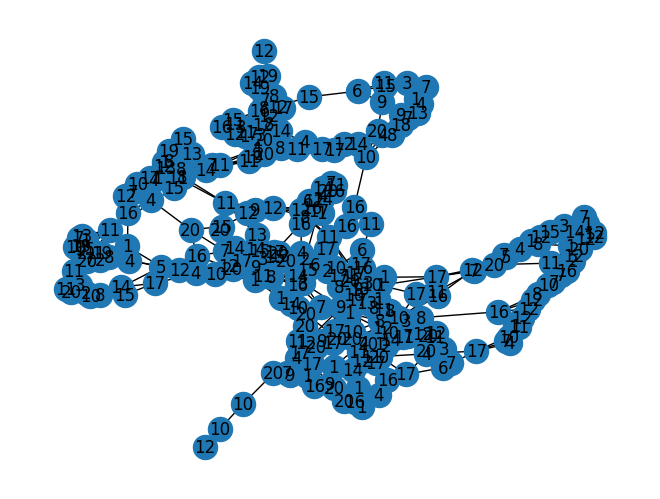

KeyboardInterrupt: 

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# خواندن فایل DD244.edges
with open("/content/sample_data/DD244.edges") as file:
    data = file.readlines()

edges = []
for line in data:
    edge = line.strip().split()
    edges.append((int(edge[0]), int(edge[1])))
    num_nodes = max(max(edges))

# ساخت ماتریس مجاورت
adj_matrix = np.zeros((num_nodes, num_nodes))

# پر کردن ماتریس مجاورت با یال‌ها
for edge in edges:
    node1, node2 = edge
    adj_matrix[node1-1, node2-1] = 1
    adj_matrix[node2-1, node1-1] = 1

# چاپ ماتریس مجاورت
print(adj_matrix)
#############################################################################
# خواندن فایل DD244.node_labels
with open("/content/sample_data/DD244.node_labels") as file:
    data = file.readlines()

node_labels = [int(label.strip()) for label in data]

# ایجاد گراف
G = nx.Graph()
G.add_edges_from(edges)
degrees = G.degree()

# چاپ درجه هر راس
for node, degree in degrees:
    print("درجه گره", node, ":", degree)
####  ####  #############################################################################
weights = {}
for edge in edges:
    node1, node2 = edge
    weight = (degrees[node1] + degrees[node2]) / 2
    weights[edge] = weight

# چاپ وزن هر یال
for edge, weight in weights.items():
    print("وزن یال", edge, ":", weight)
#########################################################################################################################
# تنظیم برچسب‌ها روی گره‌ها
labels = {i+1: label for i, label in enumerate(node_labels)}
# رسم گراف
pos = nx.spring_layout(G)  # تعیین موقعیت گره‌ها در صفحه
nx.draw(G, pos, with_labels=True, labels=labels)
plt.show()

# تعیین برچسب برای گره‌های 250 تا 291
remaining_nodes = set(range(250, 292))

while remaining_nodes:
    for node in remaining_nodes:
        neighbors = G.neighbors(node)
        neighbor_labels = [node_labels[n] for n in neighbors if n in node_labels]
        if neighbor_labels:
            node_labels[node] = max(set(neighbor_labels), key=neighbor_labels.count)
            remaining_nodes.remove(node)

# چاپ برچسب‌های تعیین شده
for node, label in enumerate(node_labels):
    print("برچسب گره", node, ":", label)
    ################################################################################################################





In [2]:
import networkx as nx
import numpy as np
def jaccard_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    intersection = len(neighbors_i.intersection(neighbors_j))
    union = len(neighbors_i.union(neighbors_j))

    # Prevent division by zero (set small value instead)
    if union == 0.0:
        return 0.0

    return intersection / union

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and weighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the Jaccard index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            jaccard_value = jaccard_index(node_i, node_j, G)
            print(f"Jaccard index between node {node_i} and node {node_j}: {jaccard_value:.4f}")

########################################################################################################################################


Streaming output truncated to the last 5000 lines.
Jaccard index between node 22 and node 198: 0.2143
Jaccard index between node 22 and node 202: 0.1677
Jaccard index between node 22 and node 208: 0.1986
Jaccard index between node 22 and node 211: 0.1753
Jaccard index between node 22 and node 231: 0.1544
Jaccard index between node 22 and node 245: 0.1879
Jaccard index between node 22 and node 250: 0.1489
Jaccard index between node 22 and node 268: 0.1931
Jaccard index between node 22 and node 281: 0.1565
Jaccard index between node 22 and node 16: 0.2000
Jaccard index between node 22 and node 25: 0.1901
Jaccard index between node 22 and node 34: 0.1884
Jaccard index between node 22 and node 46: 0.1325
Jaccard index between node 22 and node 51: 0.1857
Jaccard index between node 22 and node 57: 0.1507
Jaccard index between node 22 and node 77: 0.2117
Jaccard index between node 22 and node 161: 0.1711
Jaccard index between node 22 and node 180: 0.2013
Jaccard index between node 22 and node

In [3]:

def sorensen_index(node_i, node_j, G):


  neighbors_i = set(G.neighbors(node_i))
  neighbors_j = set(G.neighbors(node_j))

  intersection = len(neighbors_i.intersection(neighbors_j))
  union = len(neighbors_i.union(neighbors_j))

  # Prevent division by zero (set small value instead)
  if union == 0.0:
    return 0.0

  return 2 * intersection / union

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
  G.add_node(i)
  for j in range(i + 1, 291):
    if np.random.rand() < 0.3:  # Randomly add edges with some probability
      G.add_edge(i, j)

# Calculate and print the Sørensen index for all node pairs
for node_i in G.nodes:
  for node_j in G.nodes:
    if node_i != node_j:
      sorensen_value = sorensen_index(node_i, node_j, G)
      print(f"Serensen index between node {node_i} and node {node_j}: {sorensen_value:.4f}")

Streaming output truncated to the last 5000 lines.
Serensen index between node 97 and node 290: 0.3942
Serensen index between node 97 and node 7: 0.3636
Serensen index between node 97 and node 33: 0.3478
Serensen index between node 97 and node 52: 0.3776
Serensen index between node 97 and node 58: 0.2993
Serensen index between node 97 and node 81: 0.3497
Serensen index between node 97 and node 134: 0.4662
Serensen index between node 97 and node 142: 0.3919
Serensen index between node 97 and node 149: 0.4000
Serensen index between node 97 and node 152: 0.3217
Serensen index between node 97 and node 172: 0.3453
Serensen index between node 97 and node 173: 0.2254
Serensen index between node 97 and node 187: 0.2745
Serensen index between node 97 and node 197: 0.4648
Serensen index between node 97 and node 201: 0.3731
Serensen index between node 97 and node 223: 0.4091
Serensen index between node 97 and node 243: 0.3357
Serensen index between node 97 and node 254: 0.2857
Serensen index betw

AttributeError: module 'networkx' has no attribute 'simpson_coefficient'

In [4]:

def hub_promoted_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    intersection = len(neighbors_i.intersection(neighbors_j))
    minimum_degree = min(len(neighbors_i), len(neighbors_j))

    # Prevent division by zero (set small value instead)
    if minimum_degree == 0.0:
        return 0.0

    return intersection / minimum_degree

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the HPI index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            hpi_value = hub_promoted_index(node_i, node_j, G)
            print(f"Hub Promoted Index between node {node_i} and node {node_j}: {hpi_value:.4f}")

Streaming output truncated to the last 5000 lines.
Hub Promoted Index between node 115 and node 106: 0.2941
Hub Promoted Index between node 115 and node 112: 0.2911
Hub Promoted Index between node 115 and node 117: 0.2338
Hub Promoted Index between node 115 and node 131: 0.2346
Hub Promoted Index between node 115 and node 137: 0.3412
Hub Promoted Index between node 115 and node 154: 0.3521
Hub Promoted Index between node 115 and node 155: 0.3647
Hub Promoted Index between node 115 and node 163: 0.3647
Hub Promoted Index between node 115 and node 171: 0.3014
Hub Promoted Index between node 115 and node 179: 0.3647
Hub Promoted Index between node 115 and node 180: 0.3529
Hub Promoted Index between node 115 and node 198: 0.2500
Hub Promoted Index between node 115 and node 223: 0.3472
Hub Promoted Index between node 115 and node 224: 0.3171
Hub Promoted Index between node 115 and node 225: 0.3529
Hub Promoted Index between node 115 and node 237: 0.3000
Hub Promoted Index between node 115 a

In [5]:
import networkx as nx

def hub_depressed_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    intersection = len(neighbors_i.intersection(neighbors_j))
    maximum_degree = max(len(neighbors_i), len(neighbors_j))

    # Prevent division by zero (set small value instead)
    if maximum_degree == 0.0:
        return 0.0

    return intersection / maximum_degree

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the HDI for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            hdi_value = hub_depressed_index(node_i, node_j, G)
            print(f"Hub Depressed Index between node {node_i} and node {node_j}: {hdi_value:.4f}")

Streaming output truncated to the last 5000 lines.
Hub Depressed Index between node 107 and node 13: 0.3191
Hub Depressed Index between node 107 and node 15: 0.3034
Hub Depressed Index between node 107 and node 16: 0.2791
Hub Depressed Index between node 107 and node 28: 0.3404
Hub Depressed Index between node 107 and node 37: 0.2093
Hub Depressed Index between node 107 and node 40: 0.2632
Hub Depressed Index between node 107 and node 46: 0.2444
Hub Depressed Index between node 107 and node 98: 0.2674
Hub Depressed Index between node 107 and node 101: 0.3256
Hub Depressed Index between node 107 and node 117: 0.2674
Hub Depressed Index between node 107 and node 126: 0.2885
Hub Depressed Index between node 107 and node 156: 0.2674
Hub Depressed Index between node 107 and node 168: 0.3372
Hub Depressed Index between node 107 and node 187: 0.3125
Hub Depressed Index between node 107 and node 198: 0.2674
Hub Depressed Index between node 107 and node 199: 0.2907
Hub Depressed Index between n

In [6]:


def leicht_holme_newman_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    intersection = len(neighbors_i.intersection(neighbors_j))
    product_degrees = len(neighbors_i) * len(neighbors_j)

    # Prevent division by zero (set small value instead)
    if product_degrees == 0.0:
        return 0.0

    return intersection / product_degrees

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the LHN1 index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            lhn1_value = leicht_holme_newman_index(node_i, node_j, G)
            print(f"Leicht-Holme-Newman Index between node {node_i} and node {node_j}: {lhn1_value:.4f}")

Streaming output truncated to the last 5000 lines.
Leicht-Holme-Newman Index between node 113 and node 34: 0.0034
Leicht-Holme-Newman Index between node 113 and node 75: 0.0035
Leicht-Holme-Newman Index between node 113 and node 119: 0.0032
Leicht-Holme-Newman Index between node 113 and node 128: 0.0034
Leicht-Holme-Newman Index between node 113 and node 159: 0.0029
Leicht-Holme-Newman Index between node 113 and node 169: 0.0034
Leicht-Holme-Newman Index between node 113 and node 183: 0.0022
Leicht-Holme-Newman Index between node 113 and node 194: 0.0034
Leicht-Holme-Newman Index between node 113 and node 199: 0.0036
Leicht-Holme-Newman Index between node 113 and node 213: 0.0033
Leicht-Holme-Newman Index between node 113 and node 223: 0.0037
Leicht-Holme-Newman Index between node 113 and node 248: 0.0030
Leicht-Holme-Newman Index between node 113 and node 251: 0.0033
Leicht-Holme-Newman Index between node 113 and node 256: 0.0027
Leicht-Holme-Newman Index between node 113 and node 275

In [7]:

def preferential_attachment_index(node_i, node_j, G):


    degree_i = G.degree[node_i]
    degree_j = G.degree[node_j]

    return degree_i * degree_j

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the PA index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            pa_value = preferential_attachment_index(node_i, node_j, G)
            print(f"Preferential Attachment Index between node {node_i} and node {node_j}: {pa_value:.4f}")

Streaming output truncated to the last 5000 lines.
Preferential Attachment Index between node 82 and node 288: 7470.0000
Preferential Attachment Index between node 82 and node 1: 7650.0000
Preferential Attachment Index between node 82 and node 5: 7200.0000
Preferential Attachment Index between node 82 and node 6: 7200.0000
Preferential Attachment Index between node 82 and node 11: 8460.0000
Preferential Attachment Index between node 82 and node 15: 7650.0000
Preferential Attachment Index between node 82 and node 18: 8820.0000
Preferential Attachment Index between node 82 and node 21: 7110.0000
Preferential Attachment Index between node 82 and node 22: 7920.0000
Preferential Attachment Index between node 82 and node 24: 8370.0000
Preferential Attachment Index between node 82 and node 27: 7560.0000
Preferential Attachment Index between node 82 and node 32: 8190.0000
Preferential Attachment Index between node 82 and node 34: 8820.0000
Preferential Attachment Index between node 82 and node

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
import math

def adamic_adar_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    common_neighbors = neighbors_i.intersection(neighbors_j)
    aa_sum = 0.0

    for neighbor in common_neighbors:
        degree = G.degree[neighbor]  # Access neighbor's degree
        aa_sum += 1.0 / math.log2(degree + 1)  # +1 to avoid log of 0

    return aa_sum

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the AA index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            aa_value = adamic_adar_index(node_i, node_j, G)
            print(f"Adamic-Adar Index between node {node_i} and node {node_j}: {aa_value:.4f}")

Streaming output truncated to the last 5000 lines.
Adamic-Adar Index between node 143 and node 115: 2.9271
Adamic-Adar Index between node 143 and node 125: 3.5452
Adamic-Adar Index between node 143 and node 137: 4.6204
Adamic-Adar Index between node 143 and node 141: 3.1104
Adamic-Adar Index between node 143 and node 149: 5.3849
Adamic-Adar Index between node 143 and node 193: 2.4637
Adamic-Adar Index between node 143 and node 207: 2.6377
Adamic-Adar Index between node 143 and node 213: 3.8475
Adamic-Adar Index between node 143 and node 219: 3.2406
Adamic-Adar Index between node 143 and node 227: 2.7653
Adamic-Adar Index between node 143 and node 232: 4.1698
Adamic-Adar Index between node 143 and node 241: 3.4013
Adamic-Adar Index between node 143 and node 251: 3.0973
Adamic-Adar Index between node 143 and node 266: 4.0228
Adamic-Adar Index between node 143 and node 48: 3.2325
Adamic-Adar Index between node 143 and node 53: 5.2505
Adamic-Adar Index between node 143 and node 67: 3.2368


In [9]:
def resource_allocation_index(node_i, node_j, G):


    neighbors_i = set(G.neighbors(node_i))
    neighbors_j = set(G.neighbors(node_j))

    common_neighbors = neighbors_i.intersection(neighbors_j)
    ra_sum = 0.0

    for neighbor in common_neighbors:
        degree = G.degree[neighbor]  # Access neighbor's degree
        # Each common neighbor contributes 1/(neighbor's degree) resource to both x and y
        ra_sum += 1.0 / degree

    return ra_sum

# Create an empty graph (modify this based on your actual node data)
G = nx.Graph()

# Add nodes and edges (adjust based on your data)
# Example: Assuming node IDs from 0 to 290 and unweighted edges
for i in range(291):
    G.add_node(i)
    for j in range(i + 1, 291):
        if np.random.rand() < 0.3:  # Randomly add edges with some probability
            G.add_edge(i, j)

# Calculate and print the RA index for all node pairs
for node_i in G.nodes:
    for node_j in G.nodes:
        if node_i != node_j:
            ra_value = resource_allocation_index(node_i, node_j, G)
            print(f"Resource Allocation Index between node {node_i} and node {node_j}: {ra_value:.4f}")

Streaming output truncated to the last 5000 lines.
Resource Allocation Index between node 49 and node 219: 0.3838
Resource Allocation Index between node 49 and node 222: 0.2873
Resource Allocation Index between node 49 and node 229: 0.2893
Resource Allocation Index between node 49 and node 235: 0.3069
Resource Allocation Index between node 49 and node 244: 0.3501
Resource Allocation Index between node 49 and node 252: 0.2834
Resource Allocation Index between node 49 and node 258: 0.3041
Resource Allocation Index between node 49 and node 269: 0.3672
Resource Allocation Index between node 49 and node 283: 0.3349
Resource Allocation Index between node 49 and node 288: 0.2549
Resource Allocation Index between node 49 and node 14: 0.3378
Resource Allocation Index between node 49 and node 27: 0.3993
Resource Allocation Index between node 49 and node 34: 0.3240
Resource Allocation Index between node 49 and node 67: 0.3570
Resource Allocation Index between node 49 and node 78: 0.2824
Resource 

Predicted Adjacency Matrix (Cosine Similarity):
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Predicted Adjacency Matrix (Jaccard Similarity):
 [[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


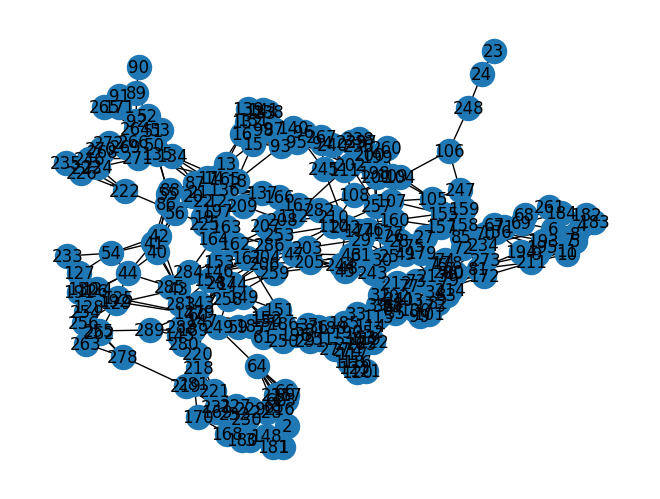

In [21]:
import numpy as np
!pip install networkx --upgrade
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

def predict_edges_cosine_similarity(features, threshold):
    num_nodes = features.shape[0]
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            cosine_sim = cosine_similarity([features[i]], [features[j]])[0][0]
            if cosine_sim > threshold:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return adjacency_matrix

def predict_edges_jaccard_similarity(features, threshold):
    num_nodes = features.shape[0]
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            jaccard_sim = jaccard_score(features[i], features[j])
            if jaccard_sim > threshold:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return adjacency_matrix


# خواندن فایل DD244.edges
with open("/content/sample_data/DD244.edges") as file:
    data = file.readlines()

edges = []
for line in data:
    edge = line.strip().split()
    edges.append((int(edge[0]), int(edge[1])))
    num_nodes = max(max(edges))

# ساخت ماتریس مجاورت
adj_matrix = np.zeros((num_nodes, num_nodes))

# پر کردن ماتریس مجاورت با یال‌ها
for edge in edges:
    node1, node2 = edge
    adj_matrix[node1-1, node2-1] = 1
    adj_matrix[node2-1, node1-1] = 1


# تبدیل ماتریس مجاورت به گراف
graph = nx.Graph()

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if adj_matrix[i, j] == 1:
            graph.add_edge(i+1, j+1)
# نمایش گراف
nx.draw(graph, with_labels=True)


# پیش‌بینی ماتریس مجاورت با استفاده از شباهت کسینوسی
threshold_cosine = 0.5  # آستانه مشخص شده برای شباهت کسینوسی
adj_matrix_cosine = predict_edges_cosine_similarity(adj_matrix, threshold_cosine)
print("Predicted Adjacency Matrix (Cosine Similarity):\n", adj_matrix_cosine)

# پیش‌بینی ماتریس مجاورت با استفاده از شباهت جاکارد
threshold_jaccard = 0.2  # آستانه مشخص شده برای شباهت جاکارد
adj_matrix_jaccard = predict_edges_jaccard_similarity(adj_matrix, threshold_jaccard)
print("Predicted Adjacency Matrix (Jaccard Similarity):\n", adj_matrix_jaccard)

In [26]:
from sklearn.metrics import roc_auc_score, precision_score

def evaluate_predictions(true_edges, predicted_edges, graph):


    true_labels = [1 if edge in true_edges else 0 for edge in predicted_edges]
    predicted_scores = []

    for u, v in predicted_edges:
        score = list(nx.jaccard_coefficient(graph, [(u, v)]))
        predicted_scores.append(score[0][2])

    auc = roc_auc_score(true_labels, predicted_scores)
    precision = precision_score(true_labels, predicted_scores)

    return {"auc": auc, "precision": precision}

